In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import env_damage, env_flooding

In [6]:
a = env_damage.generate_asli_discount_curve(path='../data/recovery_prices_asli22.tsv', ratio_mode=True, curve_kind='quadratic')
b = env_flooding.get_slager_huizinga_DDfuncs(['../data_model_inputs/flood_depth_damage_functions.tsv', '../data_model_inputs/flood_depth_damage_functions2.tsv'])

A_discount_curve: using ratio-based curve


In [28]:
bfunc = b['2-house_structural']
bfunc_huizinga = b['1-residences']
xa = np.linspace(int(a.x.min()), int(a.x.max()), 1000)
xb = np.linspace(int(bfunc.x.min()), 6,1000)

In [8]:
ya = a(xa)

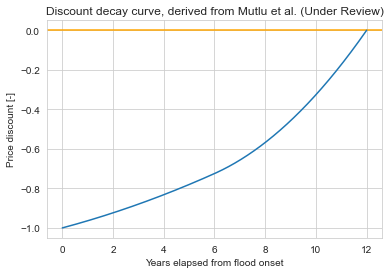

In [34]:
plt.axhline(0.0, color='orange')
sns.lineplot(x=xa/4, y=ya*-1)
plt.title("Discount decay curve, derived from Mutlu et al. (Under Review)")
plt.xlabel('Years elapsed from flood onset')
plt.ylabel("Price discount [-]")
plt.savefig('../data_model_outputs/plots_stats/discount_regression_curve.jpg', dpi=300)

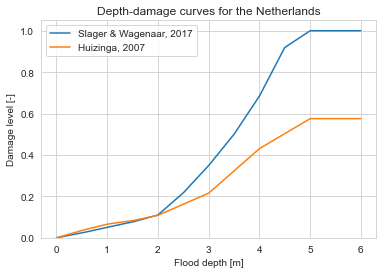

In [35]:
# yb = bfunc(xb)
plt.plot(xb, bfunc(xb), label='Slager & Wagenaar, 2017')
plt.plot(xb, bfunc_huizinga(xb), label="Huizinga, 2007")
plt.legend()
plt.title("Depth-damage curves for the Netherlands")
plt.xlabel("Flood depth [m]")
plt.ylabel("Damage level [-]")
plt.ylim((0., 1.05))
plt.savefig('../data_model_outputs/plots_stats/depth_damage_curve.jpg', dpi=300)